In [2]:
import pandas as pd
import requests
import geopandas as gpd
import tempun
import matplotlib.pyplot as plt
import json
import matplotlib.colors as mcolors

### downloading dataset

In [7]:
r = requests.get("http://repository.edition-topoi.org/collection/ICG/export/ICG_objects.cite?dl=1")

In [8]:
icg_json = r.json()

In [16]:
# save for backup:
#with open("../data/icg_cite.json", "w") as f:
#    json.dump(icg_json, f)

In [7]:
# read back the backup, in case you are offline or the dataset is no longer available
with open("../data/icg_cite.json", "r") as f:
    icg_json = json.load(f)

In [8]:
icg_df = pd.DataFrame(icg_json).T
icg_df.head(10)

,_id,_rev,id,type,update_date,scis,search_text,descr_medium,kind_filter_key,creation_date,...,dating_str,orig_text,region_id,dating_filter_key,doi,ancientcity,placeofdiscovery,placeofkeeping,region,resources
1,inscription-1,2-b20a3f34a875ffb0ecfc5fc4667e3478,1,inscription,2016-11-30 12:02:15,"{'images': {'title': 'figure set 0001', 'file'...",Κυριε βοηθοη το + δουλο σου τον εγοδομοτα κε κ...,,invocation,2015-06-08 10:45:41,...,800 - 1100,Κ(ύριε) βοήθ<ο>-\r\n η το + δ̣ο...,20,"[800, 1100]",10.17171/1-8-1,"{'id': 3, 'latitude': 38.301504, 'region_categ...","{'id': 2, 'latitude': 38.2646, 'region_categor...","{'id': 1, 'latitude': 38.2646, 'region_categor...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0001': {'id': '0001', 'metadata':..."
4,inscription-4,2-606785332ab986cd81ca33a54fa79f8e,4,inscription,2016-03-22 01:57:26,"{'images': {'title': 'figure set 0004', 'file'...",Νικομα Δορυμηνης Αλεξανδρου + ΑΥΛΙΜΑΡΙΟΥ,Giebel mit Kranz,epitaph_,2015-06-08 10:45:41,...,300 - 700,Νικό̳μ̳α̳\r\n Δορυμήνης Ἀ̣λ̣εξ-\r\n ...,20,"[300, 700]",10.17171/1-8-2958,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0004': {'id': '0004', 'metadata':..."
5,inscription-5,2-6ce452e1cd8587d82456ff28808e4a68,5,inscription,2017-09-07 13:30:15,"{'images': {'title': 'figure set 0005', 'file'...",☩ ενθαδε κατακιται τις ος επικαλιειται Πυργος ...,"Giebel mit ausgeschlagenem Kreuz: Höhe 0,54, B...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε κατά[κ]ιταί\r\n [τις ὃ...,20,"[300, 700]",10.17171/1-8-3064,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0005': {'id': '0005', 'metadata':..."
6,inscription-6,2-ec4dad4a7b0e54900b0891be3464b68f,6,inscription,2016-03-22 01:57:50,{},☩ ενθαδε κατακιτε Σοπρονια τιγατηρ Παπιου Καρπου.,"Runde Säule (Durchm. 0,38) mit recheckiger Spi...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\n κατάκιτε\r\n Σοπ[ρ]ο...,20,"[300, 700]",10.17171/1-8-3170,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
7,inscription-7,2-7712e88e62944d8a7c22ec9233ddd99d,7,inscription,2016-03-22 01:58:04,{},☩ ενθαδε κατακιτε Δομνος.,"Höhe 0,94, Breite 0,76; Inschriftenfeld",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\nκατάκιτε\r\nΔόμνος.\r\n,20,"[300, 700]",10.17171/1-8-3278,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
8,inscription-8,2-59eae04b5a4676418cba93f5efd91e60,8,inscription,2016-03-22 01:58:20,{},☩ ενθαδε κατακιτε Βασιλισυσα τιγατυρ Νικανδρου.,"Höhe 0,34, Breite 0,29",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\n κατάκιτε\r\n Βασίλισ...,20,"[300, 700]",10.17171/1-8-3381,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
9,inscription-9,2-c7bd736944ce2aedb9ee89ecaf022d1b,9,inscription,2016-03-22 01:58:33,"{'images': {'title': 'figure set 0009', 'file'...",☩ ενθαδε κατακιτε Δομετις υιος — — — ου δομεστ...,"Dreieckiger Giebel: Höhe 0,46, Breite 0,90; im...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε κατάκιτε Δομ-\r\nέτις υἱὸς [— — —]\r\...,20,"[300, 700]",10.17171/1-8-3492,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0009': {'id': '0009', 'metadata':..."
10,inscription-10,2-21b65b04a5807e3f066e08a4943a3407,10,inscription,2016-11-30 

### extracting geographies

In [9]:
icg_df["longitude"] = icg_df["ancientcity"].apply(lambda x: x["longitude"])
icg_df["latitude"] = icg_df["ancientcity"].apply(lambda x: x["latitude"])
icg_df["ancientcity_name"] = icg_df["ancientcity"].apply(lambda x: x["name"])
icg_df["region"] = icg_df["region"].apply(lambda x: x["name"])


In [10]:
geom = gpd.points_from_xy(icg_df["longitude"], icg_df["latitude"], crs="EPSG:4326")
icg_df = gpd.GeoDataFrame(icg_df, geometry=geom)

In [3]:
# background maps
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
Greece = gpd.read_file("../data/Greece_AL2.GeoJson", driver="GeoJSON") # borders of greek downloaded from https://www.kaggle.com/datasets/lsind18/greeceborders?resource=download
Asia_Minor = gpd.read_file("../data/PHI_asia-minor.geojson", driver="GeoJSON")

In [5]:
pleiades_regions = pleiades_regions.to_crs(3035)
pleiades_regions_merged = pleiades_regions.unary_union
pleiades_regions_merged_buffer = pleiades_regions_merged.buffer(distance=2000)

Greece_uu = Greece.unary_union

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pygeos/set_operations.py:388: RuntimeWarning: invalid value encountered in unary_union
  result = lib.unary_union(collections, **kwargs)


In [12]:
pleiades_regions_merged_buffer_gs = gpd.GeoSeries(pleiades_regions_merged_buffer, crs ="epsg:3035")
pleiades_regions_merged_buffer_gs = pleiades_regions_merged_buffer_gs.to_crs("epsg:4326")

(33.0, 48.0)

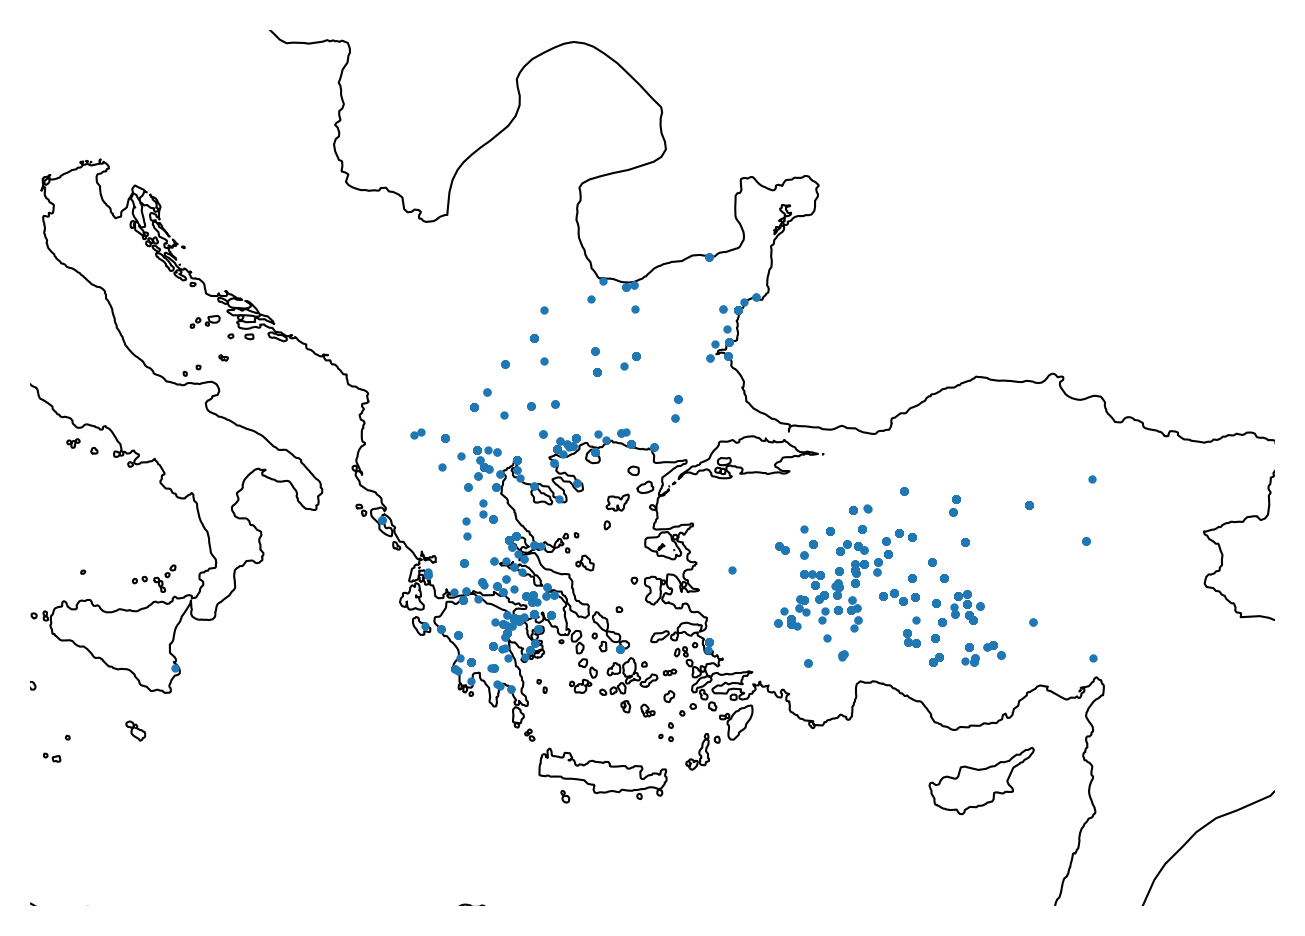

In [24]:
fig, ax = plt.subplots(figsize=(4.45, 3.5), tight_layout=True, dpi=300)
ax.axis("off")
#gplt.kdeplot(GIST[(~GIST["greece?"]) & (GIST["geometry"].notnull())], cmap='Greens', ax=ax, fill=True)
#gplt.kdeplot(GIST[GIST["greece?"]], cmap='Reds', ax=ax, fill=True)

pleiades_regions_merged_buffer_gs.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

icg_df.plot(ax=ax, markersize=1) #marker=",", markersize=0.02, ax=ax, color="firebrick") #, alpha=0.7)
ax.set_xlim(12,40)
ax.set_ylim(33,48)

In [25]:
fig.savefig("../figures/icg_map1.png")

In [27]:
icg_df.head(5)

,_id,_rev,id,type,update_date,scis,search_text,descr_medium,kind_filter_key,creation_date,...,doi,ancientcity,placeofdiscovery,placeofkeeping,region,resources,longitude,latitude,ancientcity_name,geometry
1,inscription-1,2-b20a3f34a875ffb0ecfc5fc4667e3478,1,inscription,2016-11-30 12:02:15,"{'images': {'title': 'figure set 0001', 'file'...",Κυριε βοηθοη το + δουλο σου τον εγοδομοτα κε κ...,,invocation,2015-06-08 10:45:41,...,10.17171/1-8-1,"{'id': 3, 'latitude': 38.301504, 'region_categ...","{'id': 2, 'latitude': 38.2646, 'region_categor...","{'id': 1, 'latitude': 38.2646, 'region_categor...",Lycaonia,"{'images': {'0001': {'id': '0001', 'metadata':...",32.876326,38.301504,Congussus,POINT (32.87633 38.30150)
4,inscription-4,2-606785332ab986cd81ca33a54fa79f8e,4,inscription,2016-03-22 01:57:26,"{'images': {'title': 'figure set 0004', 'file'...",Νικομα Δορυμηνης Αλεξανδρου + ΑΥΛΙΜΑΡΙΟΥ,Giebel mit Kranz,epitaph_,2015-06-08 10:45:41,...,10.17171/1-8-2958,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...",Lycaonia,"{'images': {'0004': {'id': '0004', 'metadata':...",33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
5,inscription-5,2-6ce452e1cd8587d82456ff28808e4a68,5,inscription,2017-09-07 13:30:15,"{'images': {'title': 'figure set 0005', 'file'...",☩ ενθαδε κατακιται τις ος επικαλιειται Πυργος ...,"Giebel mit ausgeschlagenem Kreuz: Höhe 0,54, B...",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3064,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...",Lycaonia,"{'images': {'0005': {'id': '0005', 'metadata':...",33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
6,inscription-6,2-ec4dad4a7b0e54900b0891be3464b68f,6,inscription,2016-03-22 01:57:50,{},☩ ενθαδε κατακιτε Σοπρονια τιγατηρ Παπιου Καρπου.,"Runde Säule (Durchm. 0,38) mit recheckiger Spi...",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3170,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...",Lycaonia,[],33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
7,inscription-7,2-7712e88e62944d8a7c22ec9233ddd99d,7,inscription,2016-03-22 01:58:04,{},☩ ενθαδε κατακιτε Δομνος.,"Höhe 0,94, Breite 0,76; Inschriftenfeld",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3278,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...",Lycaonia,[],33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)


In [28]:
icg_df["placeofdiscovery"].tolist()[:5]

[{'id': 2,
  'latitude': 38.2646,
  'region_category': 'other',
  'pleiades_id': '',
  'geonames_id': '324852',
  'name': 'Akcașar',
  'dai_gaz_id': '2227368',
  'info': 'by Zɩvarɩk',
  'longitude': 32.92138},
 {'id': 3,
  'latitude': 38.34636,
  'region_category': 'other',
  'pleiades_id': '',
  'geonames_id': '303641',
  'name': 'Akvɩran / Oğuzeli',
  'dai_gaz_id': '2194310',
  'info': 'Anzulada',
  'longitude': 33.10812},
 {'id': 3,
  'latitude': 38.34636,
  'region_category': 'other',
  'pleiades_id': '',
  'geonames_id': '303641',
  'name': 'Akvɩran / Oğuzeli',
  'dai_gaz_id': '2194310',
  'info': 'Anzulada',
  'longitude': 33.10812},
 {'id': 3,
  'latitude': 38.34636,
  'region_category': 'other',
  'pleiades_id': '',
  'geonames_id': '303641',
  'name': 'Akvɩran / Oğuzeli',
  'dai_gaz_id': '2194310',
  'info': 'Anzulada',
  'longitude': 33.10812},
 {'id': 3,
  'latitude': 38.34636,
  'region_category': 'other',
  'pleiades_id': '',
  'geonames_id': '303641',
  'name': 'Akvɩran /

In [29]:
icg_df = icg_df[["id", "doi", "thumb_baseurl", "search_text", "orig_text", "transl_text", "type", "kind", "dating_centuries", "dating_str", "ancient_city_id","ancientcity_name", "region","geometry"]]

### cleaning dates

In [30]:
dating_str = "500 - 1500"
dating_str.partition(" - ")

('500', ' - ', '1500')

In [31]:
def get_dates(dating_str):
    date_list = dating_str.partition(" - ")
    try:
        not_before = int(date_list[0])
        not_after = int(date_list[2])
    except:
        not_before = None
        not_after = None
    return not_before, not_after
dates = icg_df["dating_str"].apply(get_dates)
icg_df["not_before"] = [d[0] for d in dates]
icg_df["not_after"] = [d[1] for d in dates]

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
# save the data for future usage
icg_df.to_parquet("../data/icg_df.parquet")

# Starting with preprocessed dataset

In [33]:
icg_df = gpd.read_parquet("../data/icg_df.parquet")

In [34]:
icg_df["random_dates"] = icg_df.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=1000), axis=1)

In [35]:
icg_df.head(5)

,id,doi,thumb_baseurl,search_text,orig_text,transl_text,type,kind,dating_centuries,dating_str,ancient_city_id,ancientcity_name,region,geometry,not_before,not_after,random_dates
1,1,10.17171/1-8-1,ICG/ServiceICG/ICG0001,Κυριε βοηθοη το + δουλο σου τον εγοδομοτα κε κ...,Κ(ύριε) βοήθ<ο>-\r\n η το + δ̣ο...,"Herr, hilf deinem Diener, dem häuserbauenden G...",inscription,Invocation,"[c9, c10, c11]",800 - 1100,3,Congussus,Lycaonia,POINT (32.87633 38.30150),800.0,1100.0,"[937, 829, 1004, 880, 869, 945, 830, 874, 878,..."
4,4,10.17171/1-8-2958,ICG/ServiceICG/ICG0004,Νικομα Δορυμηνης Αλεξανδρου + ΑΥΛΙΜΑΡΙΟΥ,Νικό̳μ̳α̳\r\n Δορυμήνης Ἀ̣λ̣εξ-\r\n ...,"... Dorimenes, Sohn des Alexandros, des …",inscription,Epitaph (?),"[c4, c5, c6, c7]",300 - 700,5,Anzulada,Lycaonia,POINT (33.07533 38.33904),300.0,700.0,"[353, 555, 485, 323, 677, 401, 548, 607, 384, ..."
5,5,10.17171/1-8-3064,ICG/ServiceICG/ICG0005,☩ ενθαδε κατακιται τις ος επικαλιειται Πυργος ...,☩ ἐνθάδε κατά[κ]ιταί\r\n [τις ὃ...,"Hier liegt einer, den man noch Pyrgos nennt, m...",inscription,Epitaph,"[c4, c5, c6, c7]",300 - 700,5,Anzulada,Lycaonia,POINT (33.07533 38.33904),300.0,700.0,"[581, 374, 338, 598, 406, 437, 614, 607, 494, ..."
6,6,10.17171/1-8-3170,None,☩ ενθαδε κατακιτε Σοπρονια τιγατηρ Παπιου Καρπου.,☩ ἐνθάδε\r\n κατάκιτε\r\n Σοπ[ρ]ο...,"Hier liegt Sopronia, Tochter des Papios Karpos.",inscription,Epitaph,"[c4, c5, c6, c7]",300 - 700,5,Anzulada,Lycaonia,POINT (33.07533 38.33904),300.0,700.0,"[653, 694, 522, 618, 455, 492, 547, 648, 361, ..."
7,7,10.17171/1-8-3278,None,☩ ενθαδε κατακιτε Δομνος.,☩ ἐνθάδε\r\nκατάκιτε\r\nΔόμνος.\r\n,Hier liegt Domnos.,inscription,Epitaph,"[c4, c5, c6, c7]",300 - 700,5,Anzulada,Lycaonia,POINT (33.07533 38.33904),300.0,700.0,"[509, 675, 524, 384, 591, 559, 443, 468, 665, ..."


In [36]:
icg_regions = icg_df.groupby("region").size().sort_values(ascending=False)
icg_regions

region
Lycaonia           951
Phrygia            681
Corinthia          495
Macedonia          480
Attica             427
Galatia            415
Thessalia          170
Thracia            143
Moesia Inferior    100
Caria               94
Central Greece      60
Pisidia             57
Argolis             50
Messenia            25
Arcadia             16
Megaris             16
Laconia             15
Elis                13
Achaea              11
Cyclades             9
Euboea               8
Aegina               7
Cappadocia           7
Ionian Islands       5
Lydia                2
Epirus               2
Pontus               1
Sicily               1
Cilicia              1
dtype: int64

In [37]:
n = 6
reg_names_n = icg_regions.index.tolist()[:n]
reg_counts_n = icg_regions.values.tolist()[:n]

In [38]:
icg_regions.values.tolist()[:n]

[951, 681, 495, 480, 427, 415]

In [39]:
colors = mcolors.TABLEAU_COLORS

(0.0, 0.01)

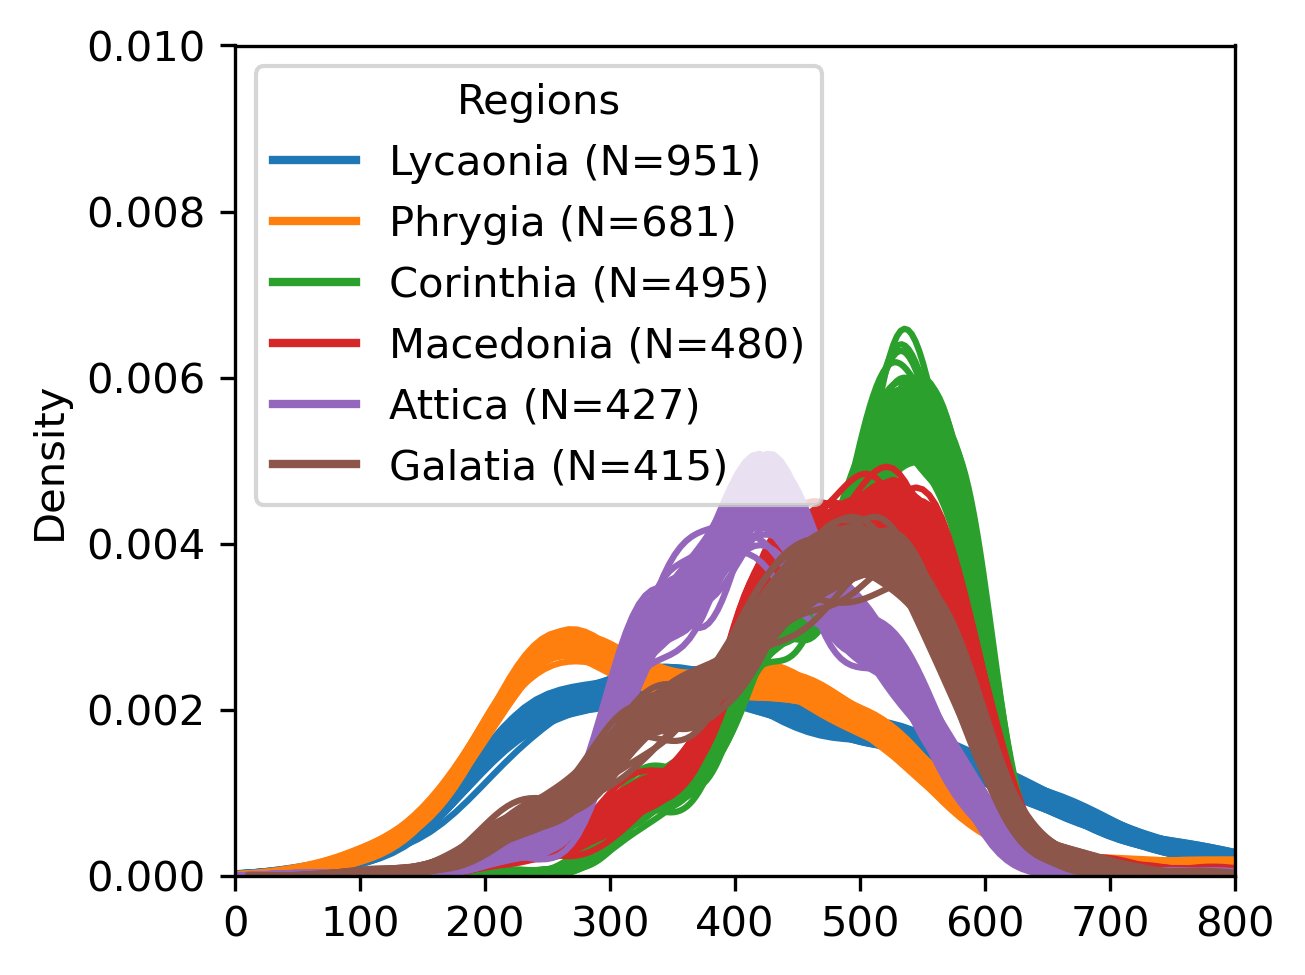

In [42]:
fig, ax = plt.subplots(tight_layout=True, figsize=(4.45, 3.35),dpi=300)
for reg, color in zip(reg_names_n, colors):
    subset_df = icg_df[icg_df["region"]==reg]
    tempun.kdeplot_from_randoms(subset_df["random_dates"], ax=ax,color=color, random_size=100)
ax.set_xlim(0,800)

labels = [name + " (N={})".format(str(count)) for name,count in zip(reg_names_n, reg_counts_n)]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax.legend(markers, labels, numpoints=1, title="Regions", bbox_to_anchor=(0, 1), loc='upper left')
ax.set_ylim(0, 0.010)

In [43]:
fig.savefig("../figures/ICG_temporal-regs.png")